# 目标
  熟悉数据集，了解数据集中变量间的相互关系，以及变量与预测值之间的存在关系
  

### 数据字段表
![title](image/field_table.PNG)

In [1]:
#载入工具库
#coding:utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

#用于画图
%matplotlib inline

#忽略警告
warnings.filterwarnings("ignore")

In [2]:
#载入数据
# Train_data=pd.read_csv("Dataset/train_data/used_car_train_20200313.csv",sep=" ")
# Test_data=pd.read_csv("Dataset/train_data/used_car_testA_20200313.csv",sep=" ")
Train_data=pd.read_csv("Dataset/train_data/used_car_train_20200313.csv",sep=" ")
TestA_data=pd.read_csv("Dataset/test_data/used_car_testA_20200313.csv",sep=" ")

#观察最前5条、最后5条，共10条数据
Train_data.head().append(Train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [3]:
TestA_data.head().append(TestA_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290
49995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,...,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,...,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,...,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,...,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353
49999,199999,193384,20041109,166.0,6,1.0,NaN,1.0,68,9.0,...,0.228730,0.000300,0.103534,0.080625,0.124264,2.914571,-1.135270,0.547628,2.094057,-1.552150


In [4]:
#查看各字段类型，及字段含空值的情况
print(Train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

可以看到训练集150000条数据中，字段"model","bodyType","fuelType","gearbox"字段有缺失值

In [5]:
print(TestA_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               50000 non-null int64
name                 50000 non-null int64
regDate              50000 non-null int64
model                50000 non-null float64
brand                50000 non-null int64
bodyType             48587 non-null float64
fuelType             47107 non-null float64
gearbox              48090 non-null float64
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
seller               50000 non-null int64
offerType            50000 non-null int64
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non

可以看出，测试集A共50000条数据，且字段"bodyType","fuelType","gearbox"字段有缺失值

In [6]:
#查看数据各字段总体分布，掌握数据大概范围及判断异常值
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [8]:
TestA_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,...,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,...,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,...,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,...,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


In [9]:
#统计每列空值数量
Train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

与info()数据结果一致

In [10]:
TestA_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

# Nan可视化

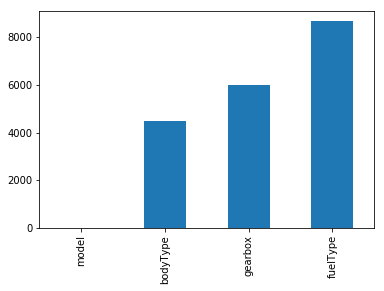

In [11]:
missing=Train_data.isnull().sum()
#选择nan>0的那些字段
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

nan数量较小时，可以填充；lgb模型可以处理nan数据，故nan数据无需处理；某字段nan数量过多时，可以剔除该特征字段

# 缺省值可视化

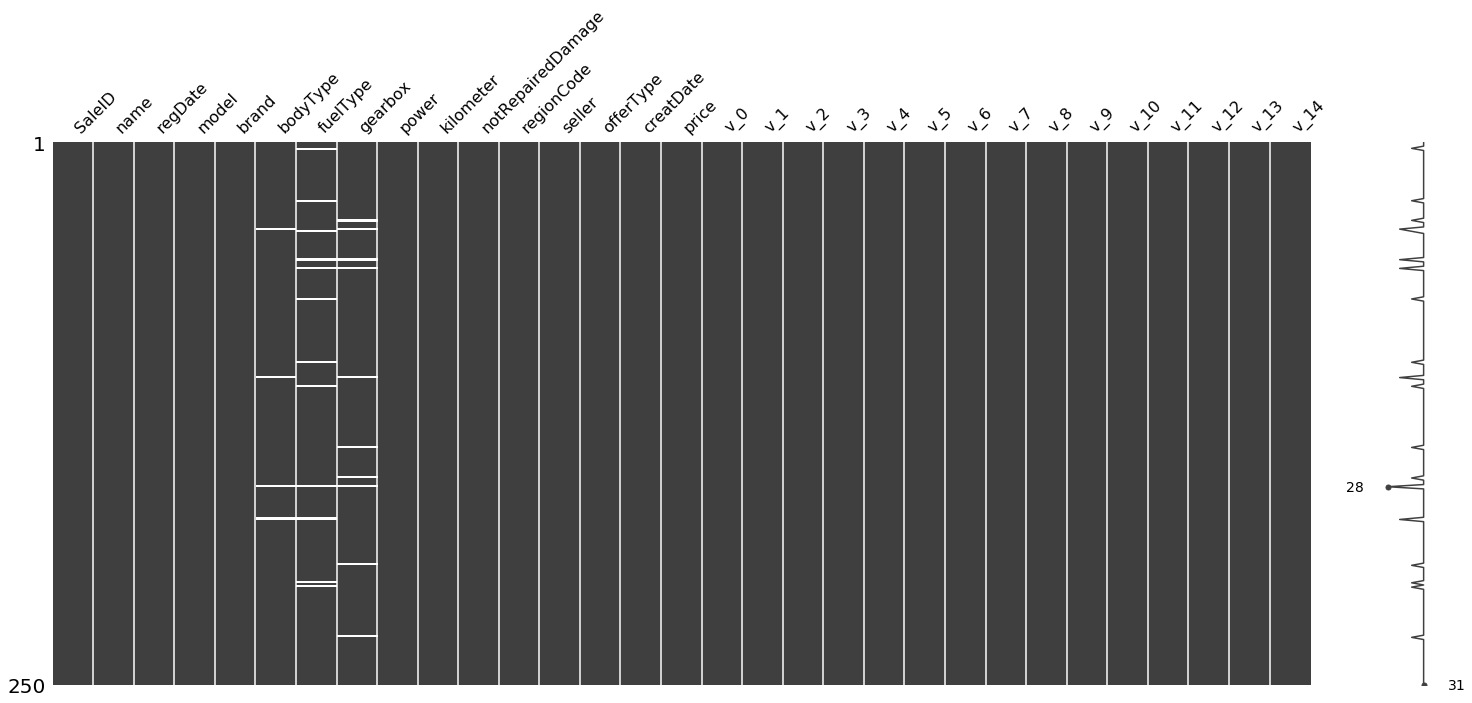

In [12]:
#训练集
msno.matrix(Train_data.sample(250))

Matrix能快速直观的看到数据集的完整性情况。白线越多，代表对应字段的缺失值越多，右边的迷你图总结了数据集的总的完整性分布，并标出了完整性的最大和最小的点，最多支持50列，还可以通过figsize指定图片大小；如果数据是时序的，可以用freq参数

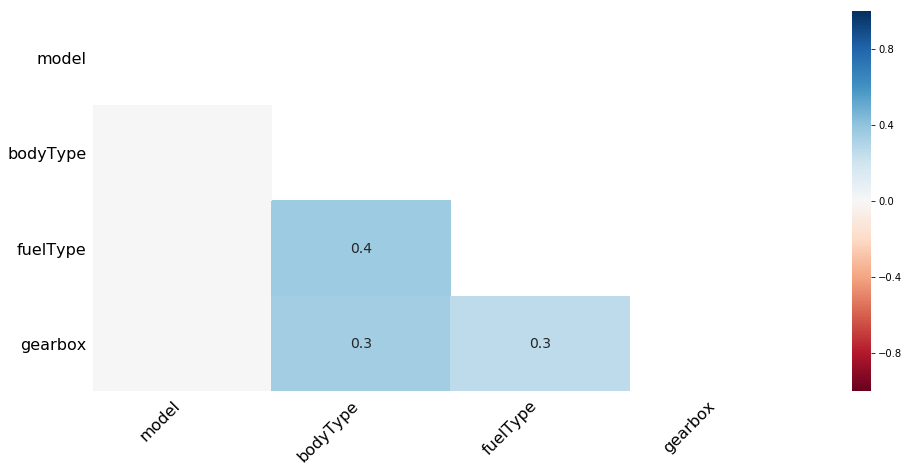

In [13]:
#生成热度图
msno.heatmap(Train_data,figsize=(16,7)) #figsize是指图的大小

热度图的含义：例如bodyType和gearbox的热度值是0.3，当gearbox缺失时，bodyType缺失的概率是0.3，表示两个含缺失值的特征之间的关系。两个变量的无效相关范围从-1(如果一个变量出现，另一个肯定没有)到0(出现或不出现的变量对彼此没有影响)到1(如果一个变量出现，另一个肯定也出现)；


热度图虽然便于观察两个变量间的相关性，但是当数据集变大，这种结论的解释性会变差。

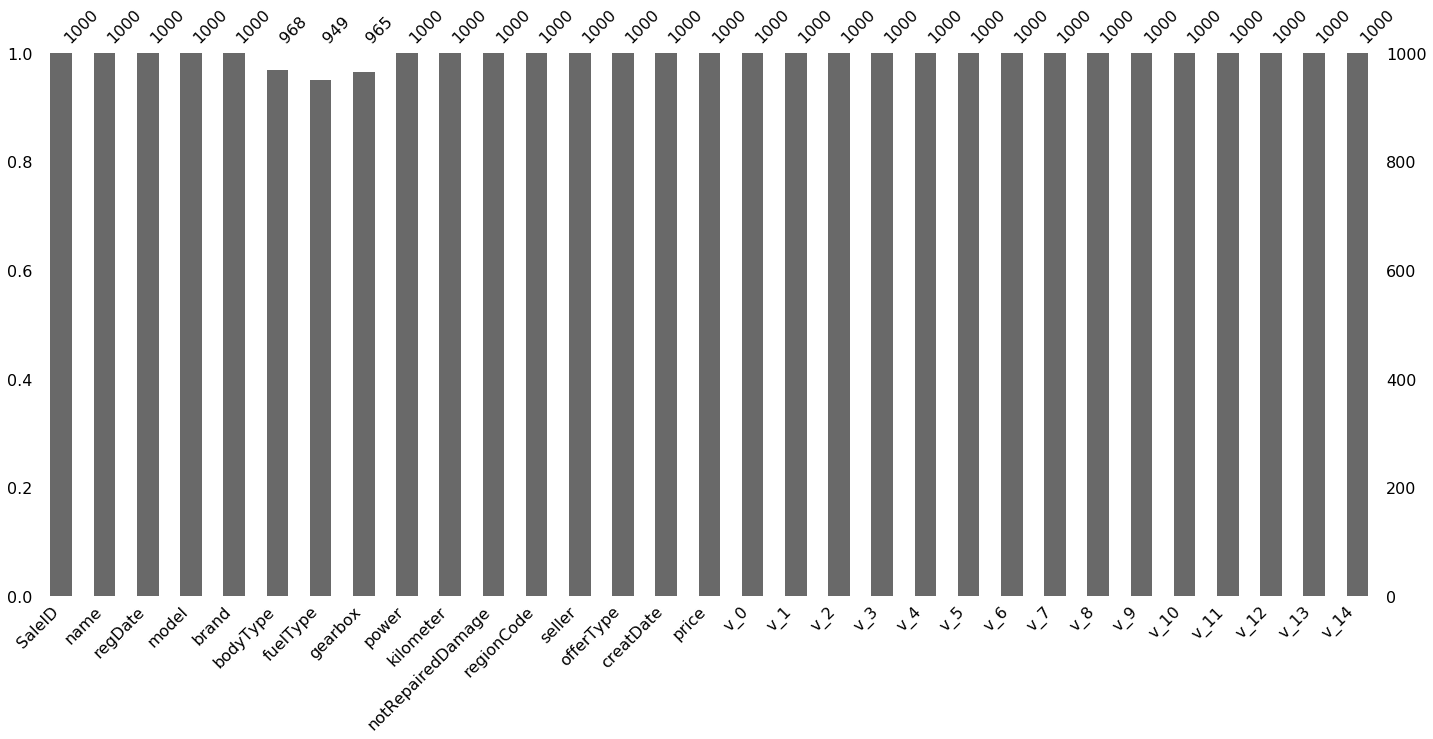

In [14]:
#条形图
msno.bar(Train_data.sample(1000))

Bar可以简单的展示无效数据的条形图

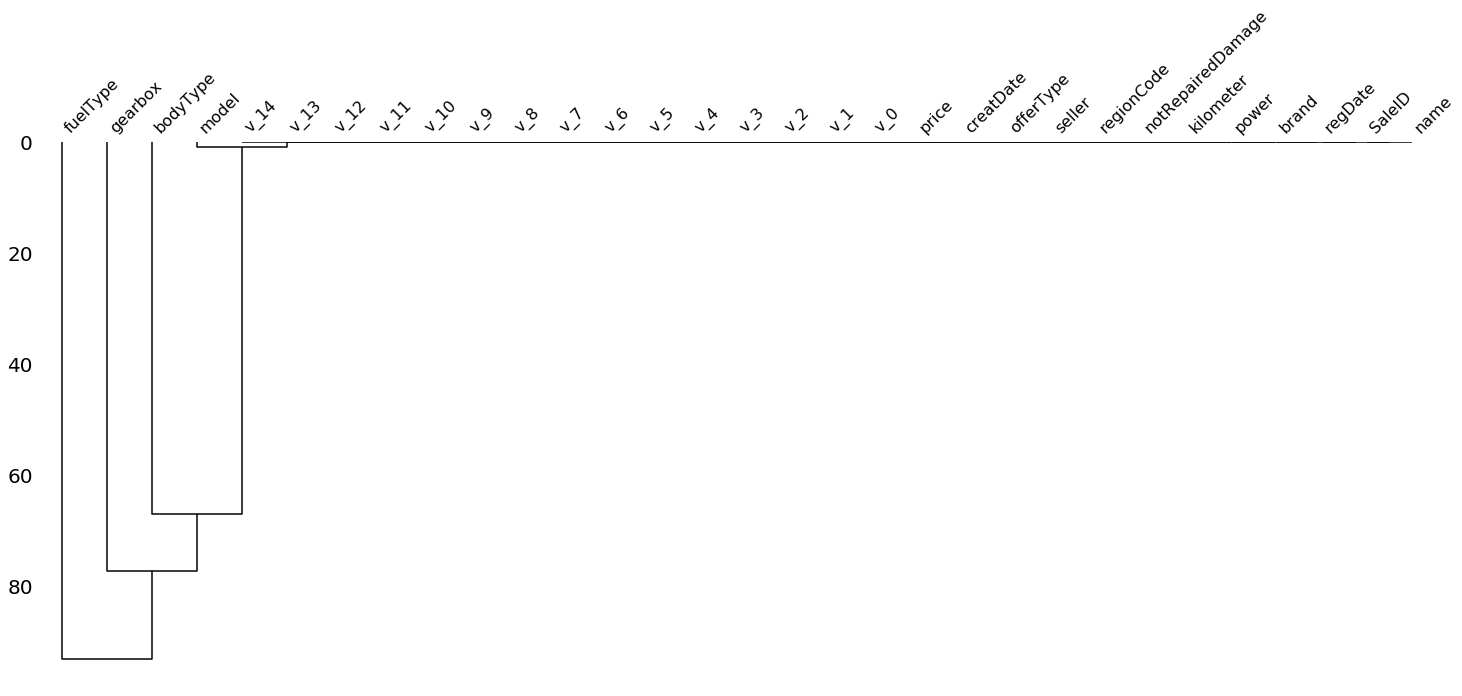

In [15]:
#树状图
msno.dendrogram(Train_data)

树状图采用scipy提供的层次聚类算法通过它们之间的无效相关性(根据二进制距离测量)将变量彼此相加。在树的每个步骤中，，基于哪个组合最小化剩余簇的距离来分隔变量。变量集越单调，它们距离越接近0，并且它们的平均距离越接近于0

在0距离处的变量间能彼此预测对方，当一个变量填充时另一个总是空的或者总是填充的。和矩阵Matrix一样，只能处理50个变量，但是通过简单的转置操作即可处理更多更大的数据集。

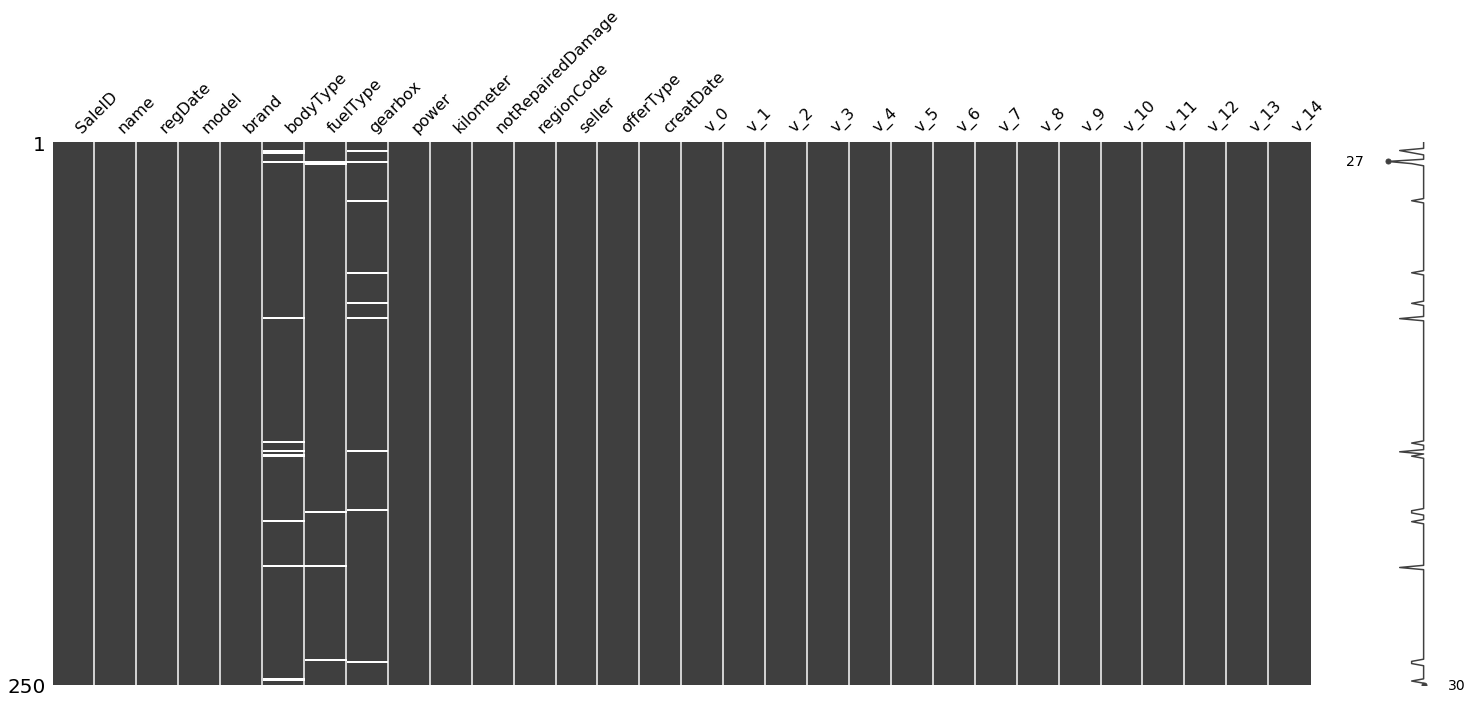

In [16]:
#测试集
msno.matrix(TestA_data.sample(250))

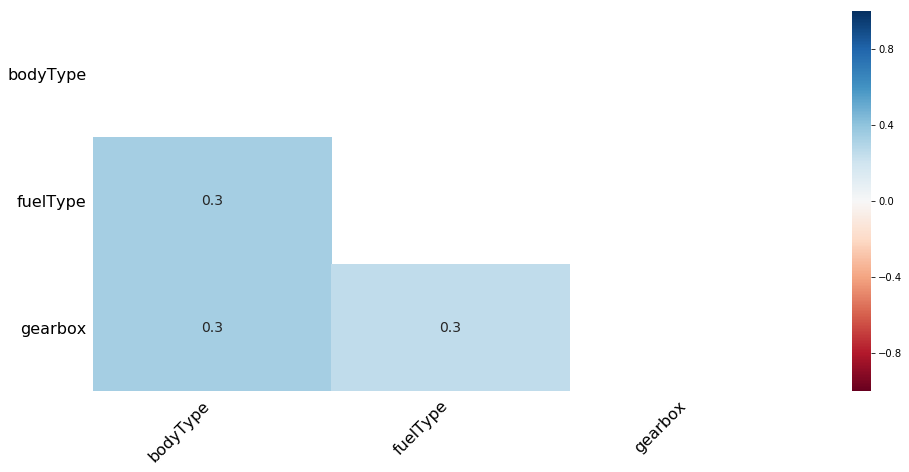

In [17]:
#生成热度图
msno.heatmap(TestA_data,figsize=(16,7)) #figsize是指图的大小

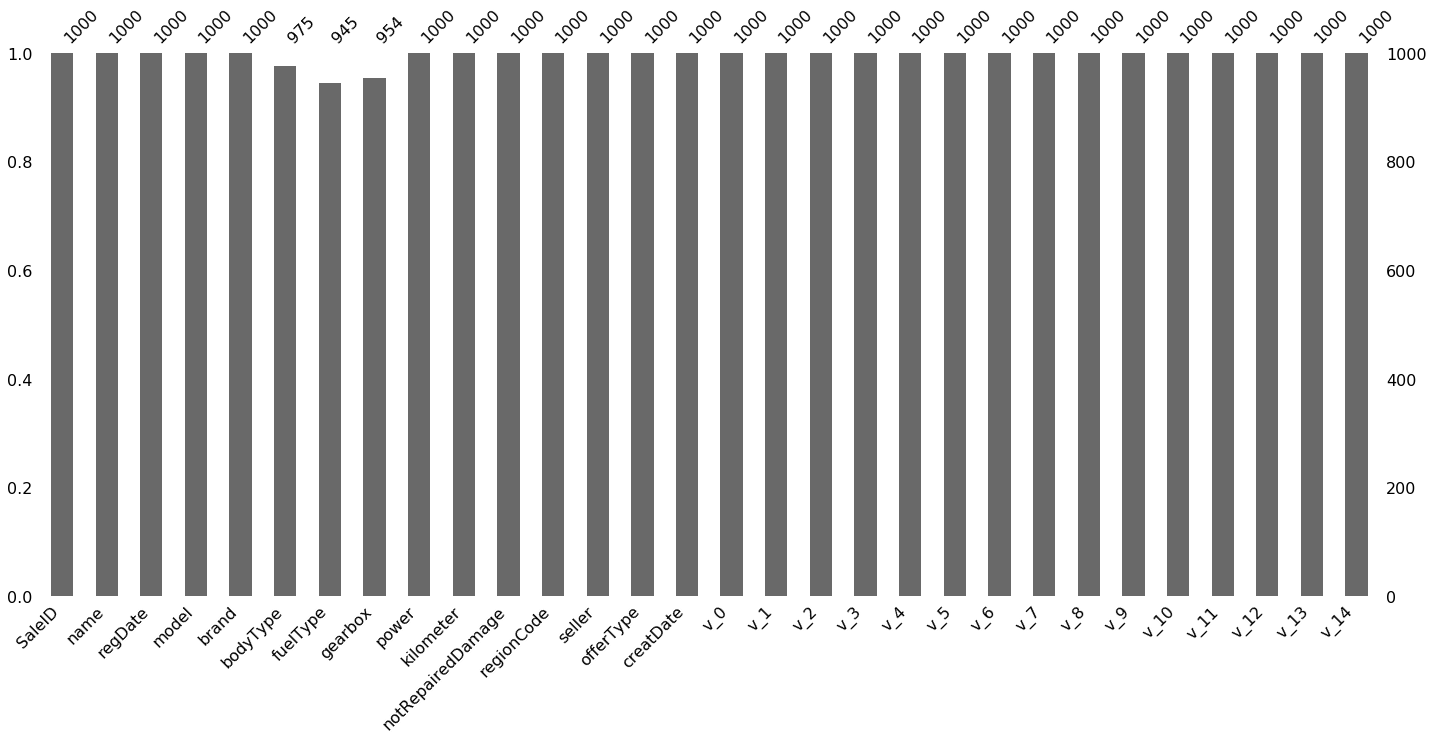

In [19]:
msno.bar(TestA_data.sample(1000))

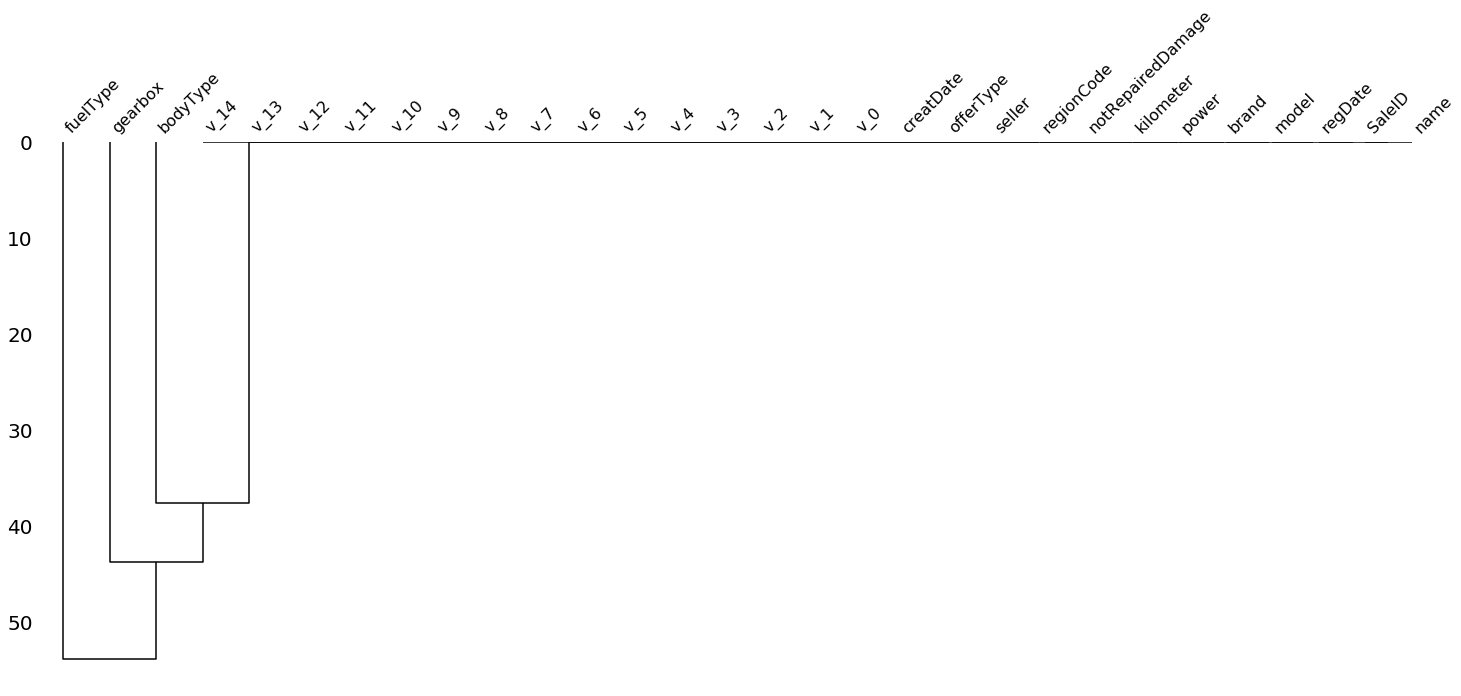

In [20]:
#树状图
msno.dendrogram(TestA_data)

## 异常值检测

In [21]:
#对object类型的字段notRepairedDamage 的不同的值进行显示
Train_data["notRepairedDamage"].value_counts() #训练集

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

可以看出"-"也可以看做缺失值，因为有很多模型对nan有直接的处理，所以先不做处理，先替换成nan

In [23]:
Train_data["notRepairedDamage"].replace("-",np.nan,inplace=True)
Train_data["notRepairedDamage"].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [24]:
Train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [25]:
TestA_data["notRepairedDamage"].value_counts() #测试集

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

In [26]:
TestA_data["notRepairedDamage"].replace("-",np.nan,inplace=True)
TestA_data["notRepairedDamage"].value_counts()

0.0    37249
1.0     4720
Name: notRepairedDamage, dtype: int64

In [27]:
TestA_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage    8031
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

## 删除类别特征严重倾斜的特征

In [28]:
Train_data["seller"].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [29]:
Train_data["offerType"].value_counts()

0    150000
Name: offerType, dtype: int64

In [30]:
#从训练集、测试集中删除
Train_data=Train_data.drop(["seller","offerType"],axis=1)
TestA_data=TestA_data.drop(["seller","offerType"],axis=1)

## 了解预测值的分布

In [31]:
#训练集
Train_data["price"] 

0          1850
1          3600
2          6222
3          2400
4          5200
5          8000
6          3500
7          1000
8          2850
9           650
10         3100
11         5450
12         1600
13         3100
14         6900
15         3200
16        10500
17         3700
18          790
19         1450
20          990
21         2800
22          350
23          599
24         9250
25         3650
26         2800
27         2399
28         4900
29         2999
          ...  
149970      900
149971     3400
149972      999
149973     3500
149974     4500
149975     3990
149976     1200
149977      330
149978     3350
149979     5000
149980     4350
149981     9000
149982     2000
149983    12000
149984     6700
149985     4200
149986     2800
149987     3000
149988     7500
149989     1150
149990      450
149991    24950
149992      950
149993     4399
149994    14780
149995     5900
149996     9500
149997     7500
149998     4999
149999     4700
Name: price, Length: 150

In [32]:
#训练集
Train_data["price"].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
600      1535
3500     1533
800      1513
2000     1378
999      1356
750      1279
4500     1271
650      1257
1800     1223
2200     1201
850      1198
700      1174
900      1107
1300     1105
950      1104
3000     1098
1100     1079
5500     1079
1600     1074
300      1071
550      1042
350      1005
1250     1003
6500      973
1999      929
         ... 
21560       1
7859        1
3120        1
2279        1
6066        1
6322        1
4275        1
10420       1
43300       1
305         1
1765        1
15970       1
44400       1
8885        1
2992        1
31850       1
15413       1
13495       1
9525        1
7270        1
13879       1
3760        1
24250       1
11360       1
10295       1
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

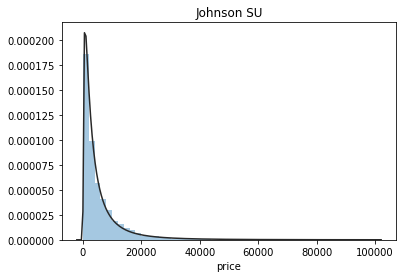

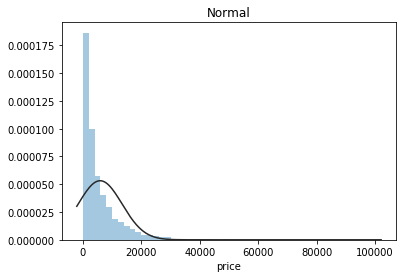

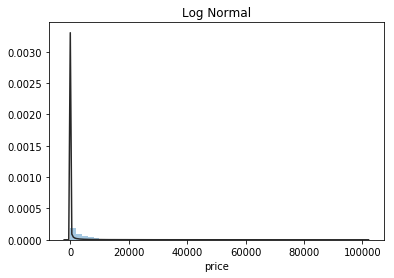

In [33]:
#总体分布概况(无界约翰逊分布等)
import scipy.stats as st
y=Train_data["price"]
plt.figure(1);
plt.title("Johnson SU")
sns.distplot(y,kde=False,fit=st.johnsonsu)

plt.figure(2);
plt.title("Normal")
sns.distplot(y,kde=False,fit=st.norm)

plt.figure(3)
plt.title("Log Normal")
sns.distplot(y,kde=False,fit=st.lognorm)

目标字段“price”不服从正太分布，所以在回归之前，必须进行转换。

虽然对数变换做的很好，但最佳拟合是无界约翰逊分布

# 查看kurtosis和skewness

## 峰度(kurtosis)
又称峰态系数，表征**概率密度**分布曲线在**平均值**处峰值高低的特征数，即描述总体中所有取值分布形态**陡缓程度**的统计量。直观看，峰度反映了峰部的尖度，该统计量需要与**正太分布**相比较。

计算公式：

![title](image/kurtosis.png)

性质:

![title](image/kurt.png)

    峰度=0表示该总体数据分布与正太分布的陡缓程度相同
  
    峰度>0表示该总体数据分布与正太分布相比较为陡峭，为尖顶峰
  
    峰度<0表示该总体数据分布与正太分布相比较为平坦，为平顶峰
  
峰度的绝对值数值越大，表示其分布形态的陡缓程度与正太分布的差异程度越大。

## 偏度(skewness)
与峰度类似，描述的是某**总体取值分布的对称性**的特征统计量,需要与正态分布比较

计算公式：

![title](image/skewness.PNG)

性质：

![title](image/skew.png)

    偏度=0表示其数据分布形态与正态分布的偏斜程度相同
    
    偏度>0表示其数据分布形态与正态分布相比为右偏(正偏)，即有一条长尾巴托在右边，数据右端有较多的极端值，数据均值右侧的离散程度强
    
    偏度<0表示其数据分布形态与正态分布相比为左偏(负偏)，即有一条长尾巴托在左边，数据左端有较多的极端值，数据均值左侧的离散程度强
    
偏度的绝对值数值越大表示其分布形态的偏斜程度越大

skewness: 3.346487
kurtosis: 18.995183


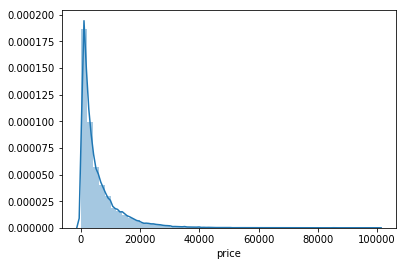

In [34]:
sns.distplot(Train_data["price"])
print("skewness: %f" % Train_data["price"].skew()) #偏度，与正态分布相比
print("kurtosis: %f" % Train_data["price"].kurt()) #峰度，与正态分布相比

In [35]:
Train_data.skew(),Train_data.kurt()

(SaleID               6.017846e-17
 name                 5.576058e-01
 regDate              2.849508e-02
 model                1.484388e+00
 brand                1.150760e+00
 bodyType             9.915299e-01
 fuelType             1.595486e+00
 gearbox              1.317514e+00
 power                6.586318e+01
 kilometer           -1.525921e+00
 notRepairedDamage    2.430640e+00
 regionCode           6.888812e-01
 creatDate           -7.901331e+01
 price                3.346487e+00
 v_0                 -1.316712e+00
 v_1                  3.594543e-01
 v_2                  4.842556e+00
 v_3                  1.062920e-01
 v_4                  3.679890e-01
 v_5                 -4.737094e+00
 v_6                  3.680730e-01
 v_7                  5.130233e+00
 v_8                  2.046133e-01
 v_9                  4.195007e-01
 v_10                 2.522046e-02
 v_11                 3.029146e+00
 v_12                 3.653576e-01
 v_13                 2.679152e-01
 v_14               

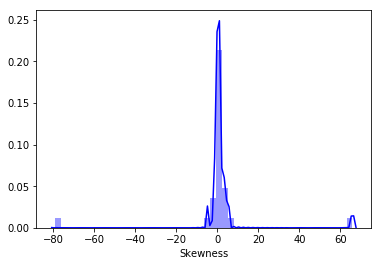

In [36]:
#可视化偏度
sns.distplot(Train_data.skew(),color="blue",axlabel="Skewness")

可以看到在(-80)、(60)处有明显的的极端值分布????

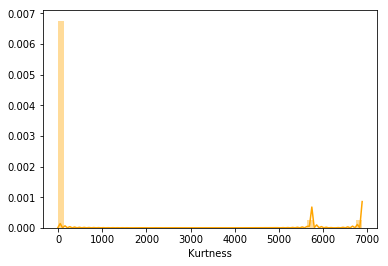

In [37]:
#可视化峰度
sns.distplot(Train_data.kurt(),color="orange",axlabel="Kurtness")

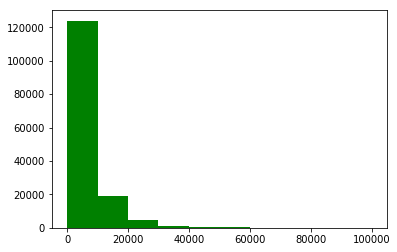

In [38]:
#查看预测值的具体频数
plt.hist(Train_data["price"],orientation="vertical",histtype="bar",color="g")
plt.show()

查看频数，大于20000的值极少，其实可以把它当做特殊值(异常值)直接填充或者删掉,再进行前面操作

In [136]:
#Train_data=Train_data.drop(Train_data.price>20000)#删除大于20000的数据

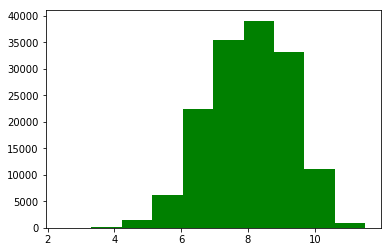

In [39]:
#log变换，使得更符合正态分布,预测log后的数据
plt.hist(np.log(Train_data["price"]),orientation="vertical",histtype="bar",color="g")
plt.show()

# 特征分为类别特征和数字特征，并对类别特征查看unique分布

In [40]:
#分离预测值标签
Y_train=Train_data["price"]

In [147]:

#该方式适用于没有直接label coding的数据，这里不适用，需要人为根据实际含义区分
#例如字段"name"已经被编码过了，但其应该属于类别特征而非数字特征

#数字特征,
#numeric_features=Train_data.select_dtypes(include=[np.number])
#numeric_features.columns

In [145]:
#类别特征
#categorical_features=Train_data.select_dtypes(include=[np.object])
#categorical_features.columns

In [41]:
#由于字段经过label coding,故人为区分数字特征和类别特征
numeric_features=['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14']
categorical_features=['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']

In [42]:
#训练集类别特征unique分布
for cat_fea in categorical_features:
    print(cat_fea+"的特征分布如下： ")
    print("{}特征{}个不同的值".format(cat_fea,Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())
    print()

name的特征分布如下： 
name特征99662个不同的值
708       282
387       282
55        280
1541      263
203       233
53        221
713       217
290       197
1186      184
911       182
2044      176
1513      160
1180      158
631       157
893       153
2765      147
473       141
1139      137
1108      132
444       129
306       127
2866      123
2402      116
533       114
1479      113
422       113
4635      110
725       110
964       109
1373      104
         ... 
89083       1
95230       1
164864      1
173060      1
179207      1
181256      1
185354      1
25564       1
19417       1
189324      1
162719      1
191373      1
193422      1
136082      1
140180      1
144278      1
146327      1
148376      1
158621      1
1404        1
15319       1
46022       1
64463       1
976         1
3025        1
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64

model的特征分布如下： 
model特征248个不同的值
0.0      11762
19.0      9573
4.0       844

In [153]:
#测试集类别特征unique分布
for cat_fea in categorical_features:
    print(cat_fea+"的特征分布如下： ")
    print("{}特征{}个不同的值".format(cat_fea,TestA_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())
    print()

name的特征分布如下： 
name特征37453个不同的值
708       282
387       282
55        280
1541      263
203       233
53        221
713       217
290       197
1186      184
911       182
2044      176
1513      160
1180      158
631       157
893       153
2765      147
473       141
1139      137
1108      132
444       129
306       127
2866      123
2402      116
533       114
1479      113
422       113
4635      110
725       110
964       109
1373      104
         ... 
89083       1
95230       1
164864      1
173060      1
179207      1
181256      1
185354      1
25564       1
19417       1
189324      1
162719      1
191373      1
193422      1
136082      1
140180      1
144278      1
146327      1
148376      1
158621      1
1404        1
15319       1
46022       1
64463       1
976         1
3025        1
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64

model的特征分布如下： 
model特征247个不同的值
0.0      11762
19.0      9573
4.0       844

## 数字特征分析

In [43]:
numeric_features.append("price") #加上"price"字段
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [44]:
Train_data[numeric_features].head()

,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,price
0,60,12.5,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1850
1,0,15.0,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,3600
2,163,12.5,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,6222
3,193,15.0,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,2400
4,68,5.0,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,5200


### 相关性分析

In [45]:
price_numeric=Train_data[numeric_features]
correlation=price_numeric.corr()
#各字段与“price”的相关性，降序输出
correlation['price'].sort_values(ascending=False)

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64

正的为正相关(price值越大，它也大)，负的为负相关(price值越大，它越小)，为0的只能说明与“price”不存在线形相关，但不代表不存在其他相关关系

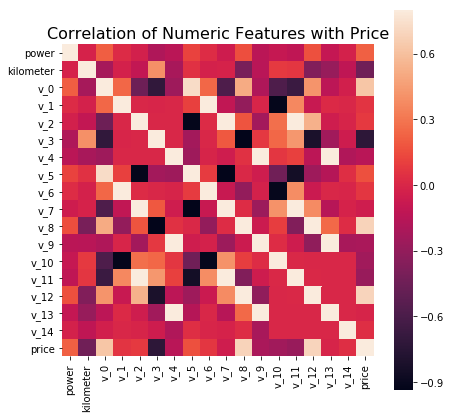

In [46]:
#可视化相关性（热图）
f,ax=plt.subplots(figsize=(7,7))
plt.title("Correlation of Numeric Features with Price",y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

从右侧标尺可看出，越白越正相关，越黑越负相关

In [47]:
price_numeric=price_numeric.drop(["price"],axis=1) #去掉“price”列

In [48]:
#查看数字特征的偏度和峰值
for col in numeric_features:
    print("{:15}".format(col),
         "Skewness: {:05.2f}".format(Train_data[col].skew()),
         "    ",
         "Kurtosis: {:06.2f}".format(Train_data[col].kurt()))

power           Skewness: 65.86      Kurtosis: 5733.45
kilometer       Skewness: -1.53      Kurtosis: 001.14
v_0             Skewness: -1.32      Kurtosis: 003.99
v_1             Skewness: 00.36      Kurtosis: -01.75
v_2             Skewness: 04.84      Kurtosis: 023.86
v_3             Skewness: 00.11      Kurtosis: -00.42
v_4             Skewness: 00.37      Kurtosis: -00.20
v_5             Skewness: -4.74      Kurtosis: 022.93
v_6             Skewness: 00.37      Kurtosis: -01.74
v_7             Skewness: 05.13      Kurtosis: 025.85
v_8             Skewness: 00.20      Kurtosis: -00.64
v_9             Skewness: 00.42      Kurtosis: -00.32
v_10            Skewness: 00.03      Kurtosis: -00.58
v_11            Skewness: 03.03      Kurtosis: 012.57
v_12            Skewness: 00.37      Kurtosis: 000.27
v_13            Skewness: 00.27      Kurtosis: -00.44
v_14            Skewness: -1.19      Kurtosis: 002.39
price           Skewness: 03.35      Kurtosis: 019.00


### 如何利用偏度和峰值对数据特征进行处理呢？？？

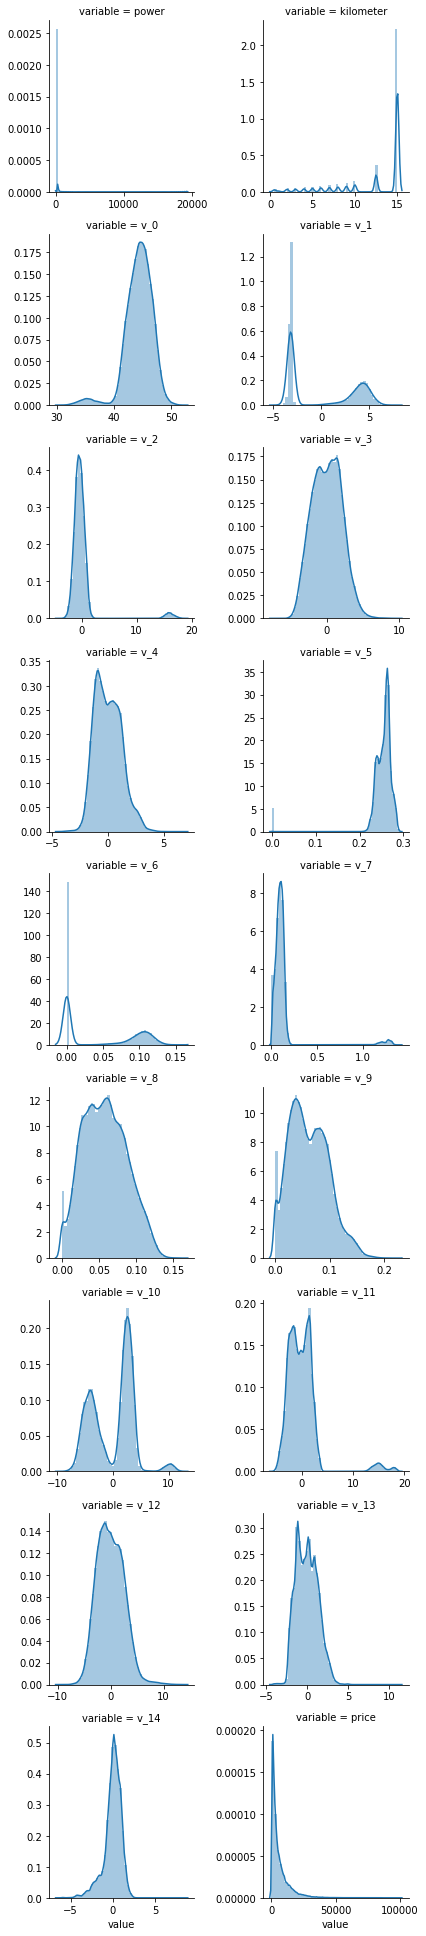

In [49]:
#每个数字特征的分布可视化
f=pd.melt(Train_data,value_vars=numeric_features) #指明数据及列
g=sns.FacetGrid(f,col="variable",col_wrap=2,sharex=False,sharey=False)
g=g.map(sns.distplot,"value")

可看出匿名特征分布相对比较均匀

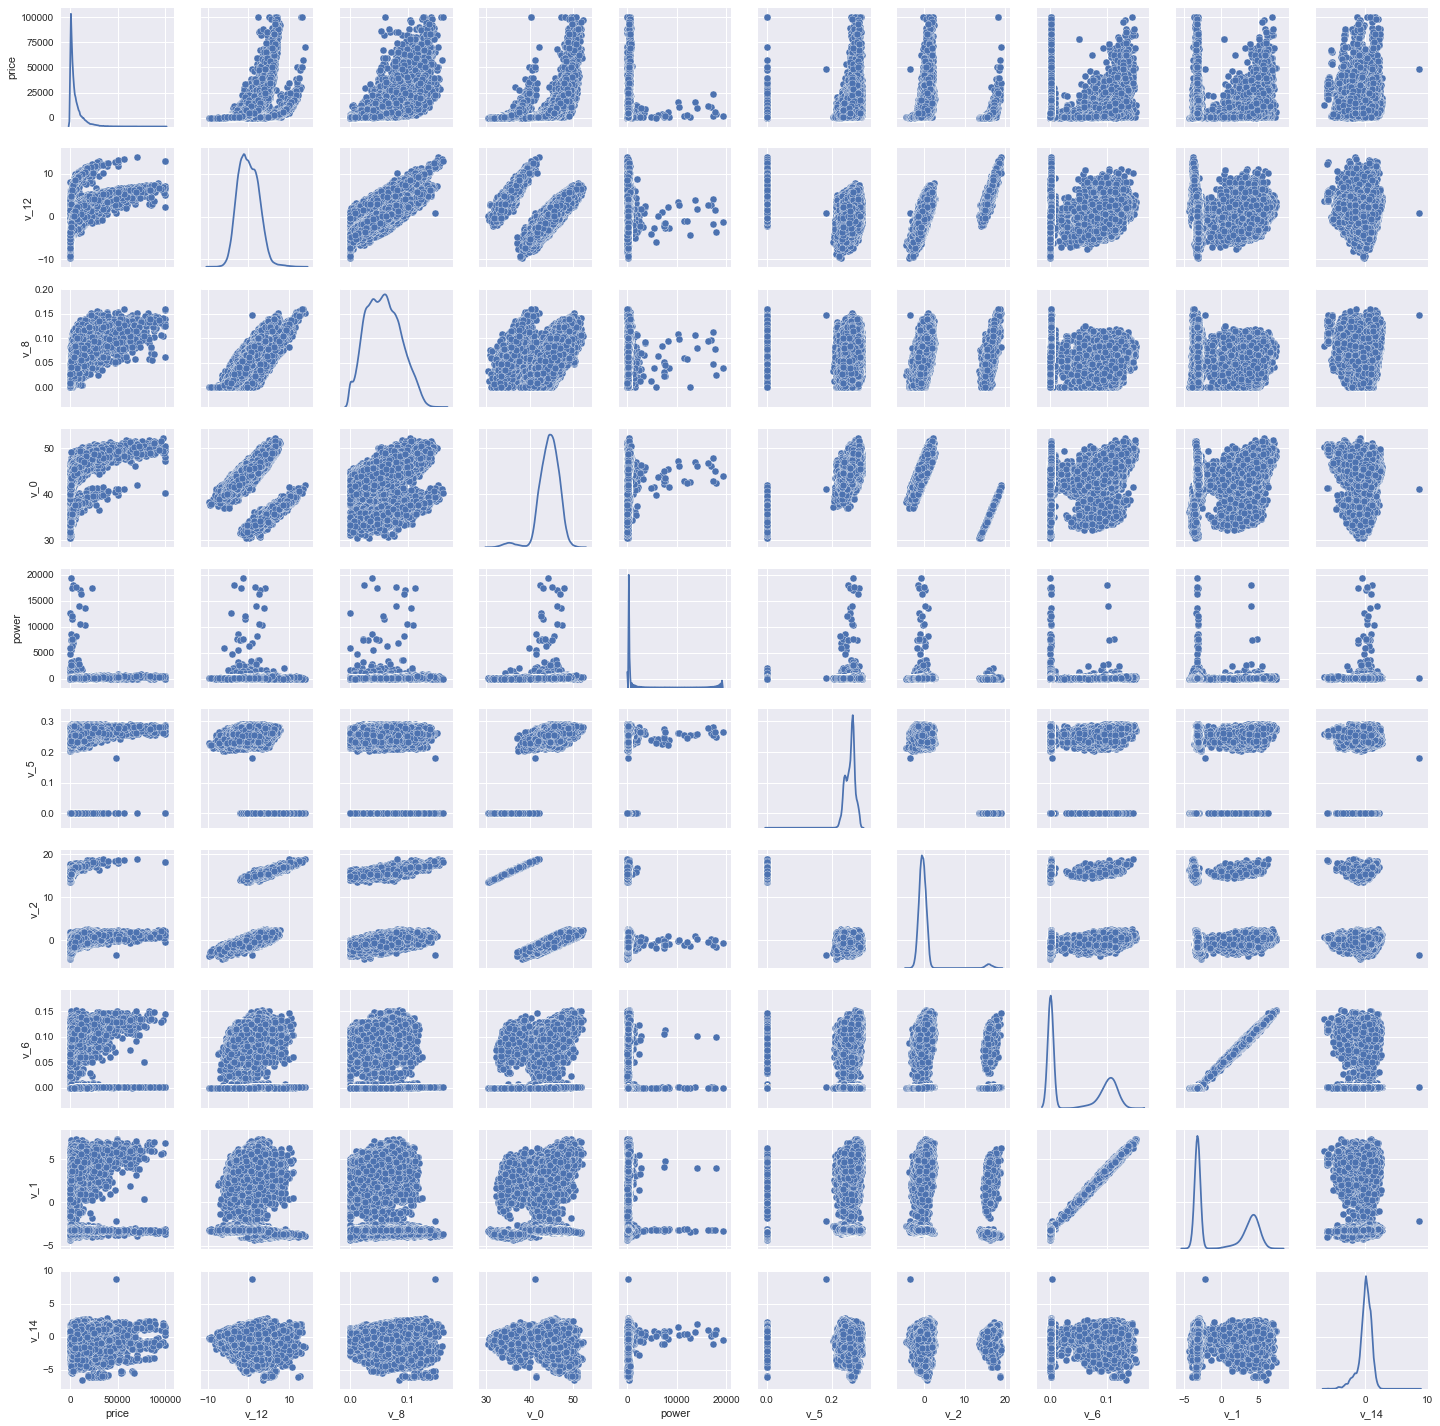

In [50]:
#可视化数字特征相互间的关系
sns.set()
columns=['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_data[columns],size=2,kind="scatter",diag_kind="kde")
plt.show()

In [51]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [52]:
Train_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
5,5,137642,20090602,24.0,10,0.0,1.0,0.0,109,10.0,...,0.260246,0.000518,0.119838,0.090922,0.048769,1.885526,-2.721943,2.457660,-0.286973,0.206573
6,6,2402,19990411,13.0,4,0.0,0.0,1.0,150,15.0,...,0.267998,0.117675,0.142334,0.025446,0.028174,-4.902200,1.610616,-0.834605,-1.996117,-0.103180
7,7,165346,19990706,26.0,14,1.0,0.0,0.0,101,15.0,...,0.239506,0.000000,0.122943,0.039839,0.082413,3.693829,-0.245014,-2.192810,0.236728,0.195567
8,8,2974,20030205,19.0,1,2.0,1.0,1.0,179,15.0,...,0.263833,0.116583,0.144255,0.039851,0.024388,-4.925234,1.587796,0.075348,-1.551098,0.069433
9,9,82021,19980101,7.0,7,5.0,0.0,0.0,88,15.0,...,0.262473,0.068267,0.012176,0.010291,0.098727,-1.089584,0.600683,-4.186210,0.198273,-1.025822


In [53]:
Y_train

0          1850
1          3600
2          6222
3          2400
4          5200
5          8000
6          3500
7          1000
8          2850
9           650
10         3100
11         5450
12         1600
13         3100
14         6900
15         3200
16        10500
17         3700
18          790
19         1450
20          990
21         2800
22          350
23          599
24         9250
25         3650
26         2800
27         2399
28         4900
29         2999
          ...  
149970      900
149971     3400
149972      999
149973     3500
149974     4500
149975     3990
149976     1200
149977      330
149978     3350
149979     5000
149980     4350
149981     9000
149982     2000
149983    12000
149984     6700
149985     4200
149986     2800
149987     3000
149988     7500
149989     1150
149990      450
149991    24950
149992      950
149993     4399
149994    14780
149995     5900
149996     9500
149997     7500
149998     4999
149999     4700
Name: price, Length: 150

### 好吧，少了两条数据？待会再回去看吧

## 多变量间的关系可视化
    更多链接https://www.jianshu.com/p/6e18d21a4cad

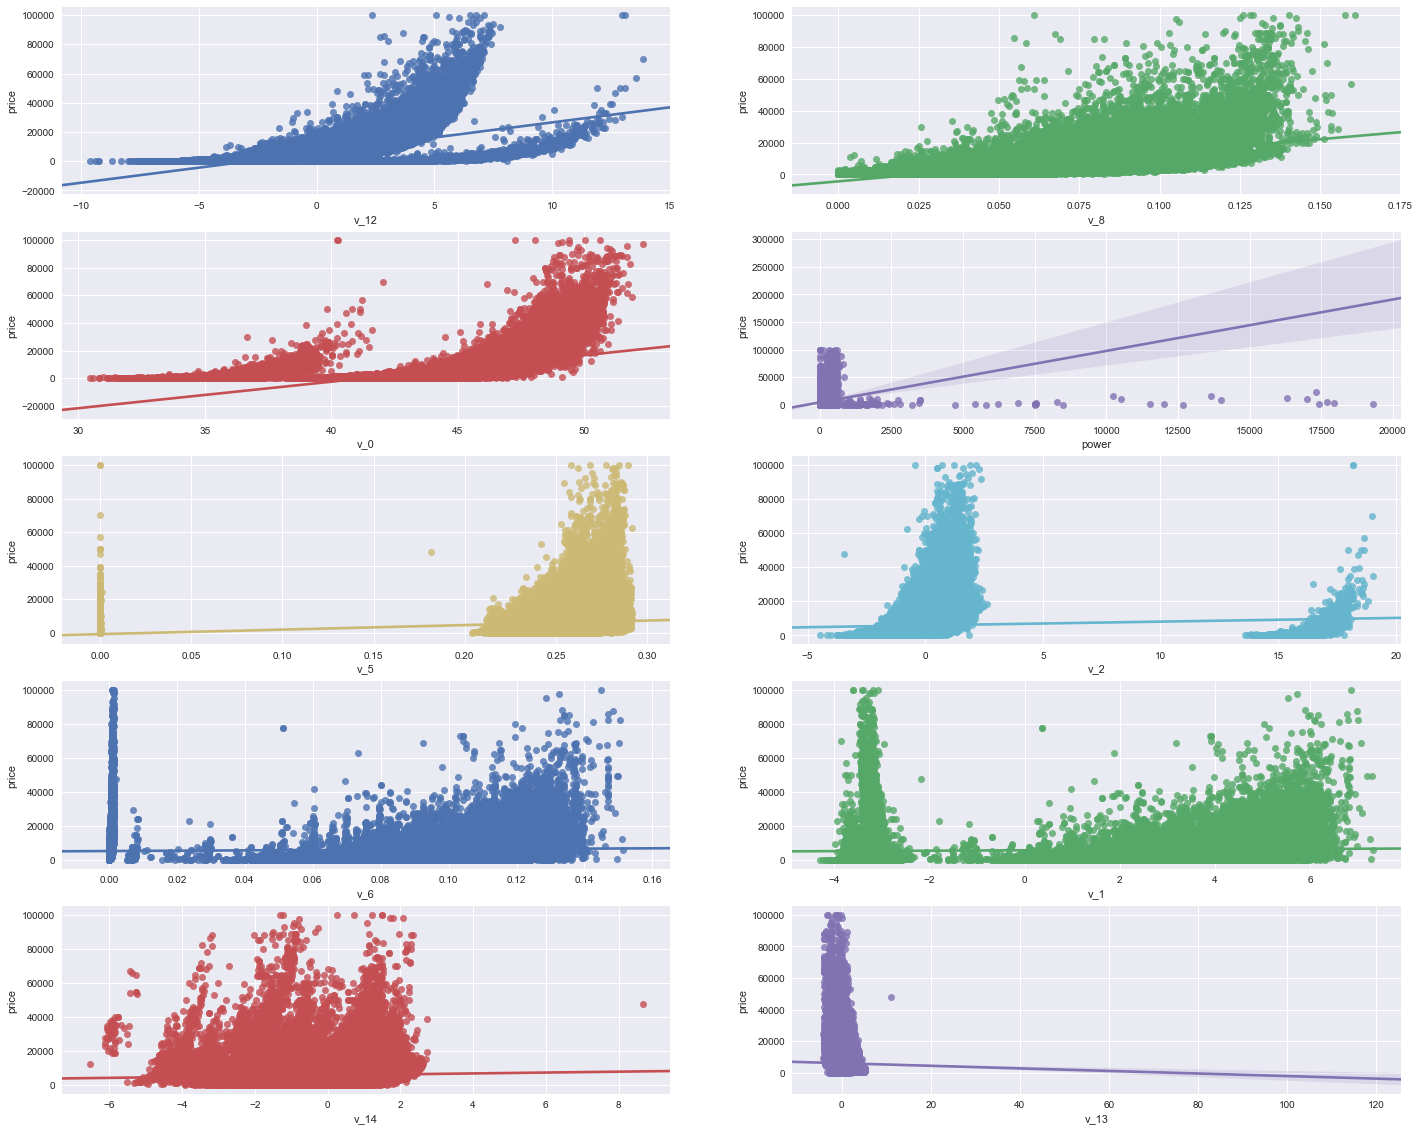

In [54]:
#多变量间线形回归关系可视化
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))=plt.subplots(nrows=5,ncols=2,figsize=(24,20))

#price与v_12的回归关系
v_12_scatter_plot=pd.concat([Y_train,Train_data["v_12"]],axis=1)
sns.regplot(x="v_12",y="price",data=v_12_scatter_plot,scatter=True,fit_reg=True,ax=ax1)

#price与v_8的h回归关系
v_8_scatter_plot=pd.concat([Y_train,Train_data["v_8"]],axis=1)
sns.regplot(x="v_8",y="price",data=v_8_scatter_plot,scatter=True,fit_reg=True,ax=ax2)

#price与v_0的回归关系
v_0_scatter_plot=pd.concat([Y_train,Train_data["v_0"]],axis=1)
sns.regplot(x="v_0",y="price",data=v_0_scatter_plot,scatter=True,fit_reg=True,ax=ax3)

#price与power的回归关系
power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

#price与v_5的回归关系
v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

#price与v_2的回归关系
v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

#price与v_6的回归关系
v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

#price与v_1的回归关系
v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

#price与v0_14的回归关系
v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

#price与v_13的回归关系
v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)

作用：上图为两个变量间的线形回归关系，图中的线即为生成的线形回归线

## 类别特征分析

In [55]:
#查看类别特征unique分布
for fea in categorical_features:
    print("{:20}".format(fea),Train_data[fea].nunique())

name                 99662
model                248
brand                40
bodyType             8
fuelType             7
gearbox              2
notRepairedDamage    2
regionCode           7905


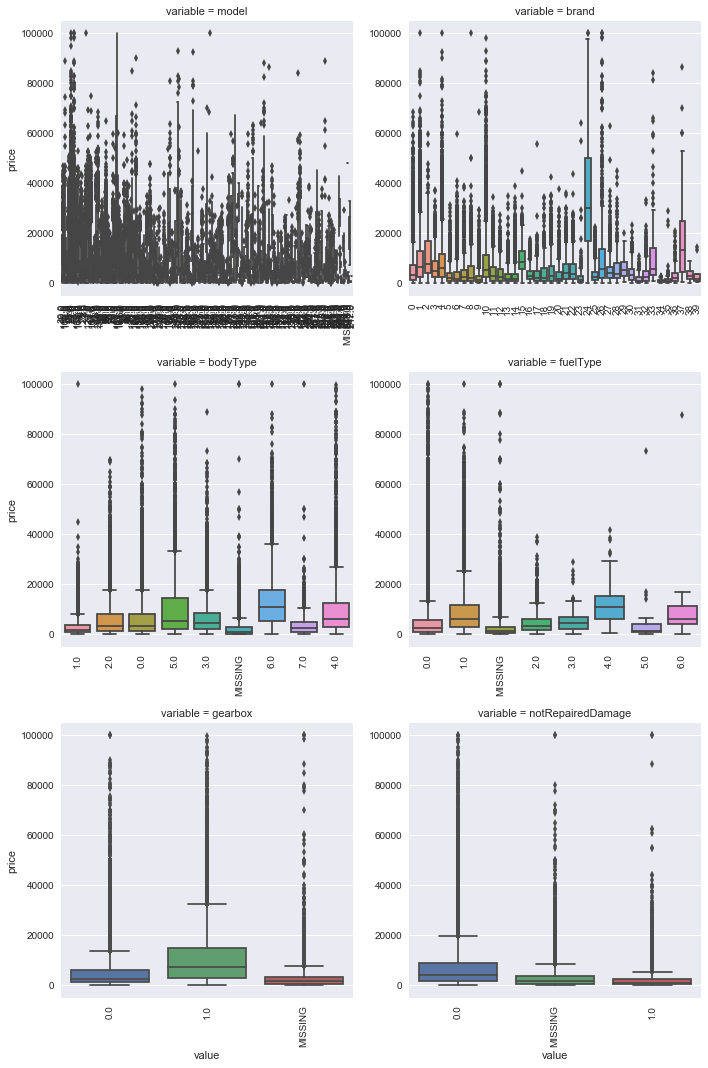

In [57]:
#类别特征箱型图可视化
#但name和regionCode 的类别太多，分布太稀疏
# 因为 name和 regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']

for c in categorical_features:
    Train_data[c]=Train_data[c].astype("category")
    if Train_data[c].isnull().any():
        Train_data[c]=Train_data[c].cat.add_categories(["MISSING"])
        Train_data[c]=Train_data[c].fillna("MISSING")

def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
    
f=pd.melt(Train_data,id_vars=["price"],value_vars=categorical_features)
g=sns.FacetGrid(f,col="variable",col_wrap=2,sharex=False,sharey=False,size=5)
g=g.map(boxplot,"value","price")

In [58]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

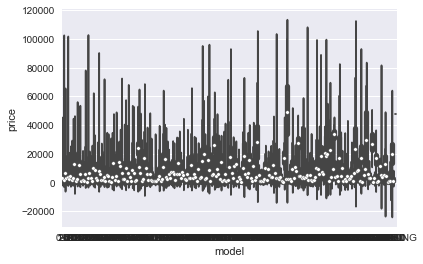

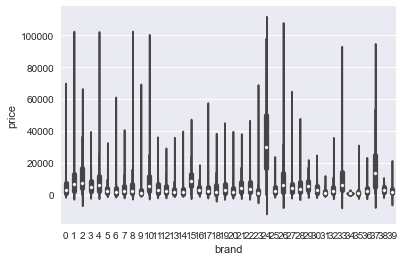

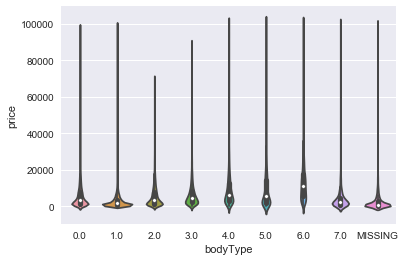

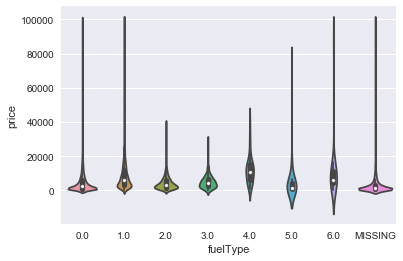

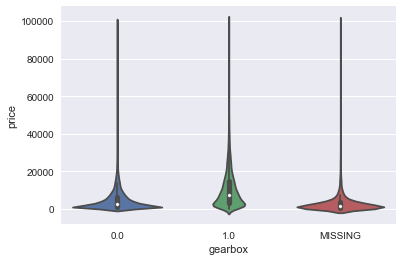

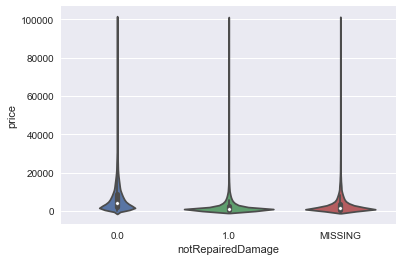

In [59]:
#类别特征小提琴图可视化
catg_list=categorical_features
target="price"
for catg in catg_list:
    sns.violinplot(x=catg,y=target,data=Train_data)
    plt.show()

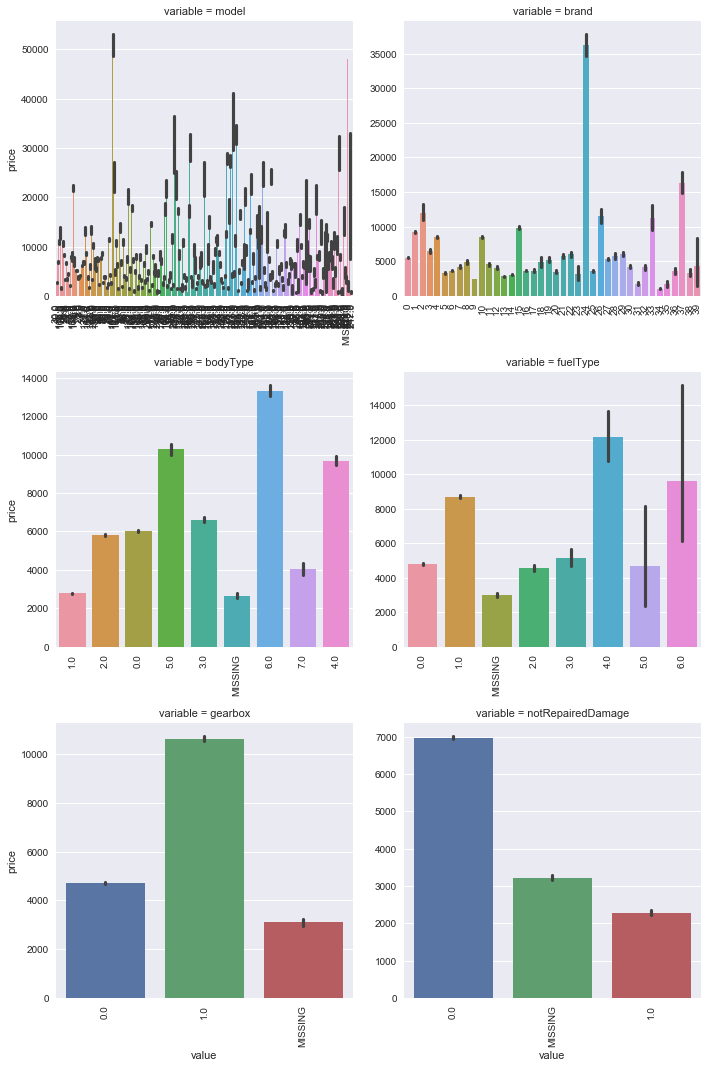

In [60]:
#类别特征的条形图可视化
def bar_plot(x,y,**kwargs):
    sns.barplot(x=x,y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "price")

条形图表示数值变量与每个矩形高度的中心趋势的估计值，并使用**误差线(黑线)**提供关于该估计值附近的不确定性的一些指示。

其中X轴为类别变量取值，纵轴为对应类别的字段“price”的取值(默认为平均值，可以通过指定参数“estimator”来修改)

条形图详解：https://blog.csdn.net/zyb228/article/details/101938152  ；https://www.jianshu.com/p/8bb06d3fd21b

条形图只显示**平均值（或其他估计值）**。但在很多情况下，每个**分类变量级别上显示值的分布**可能提供更多信息，此时很多其他方法，如**一个盒子或小提琴图**可能更合适。

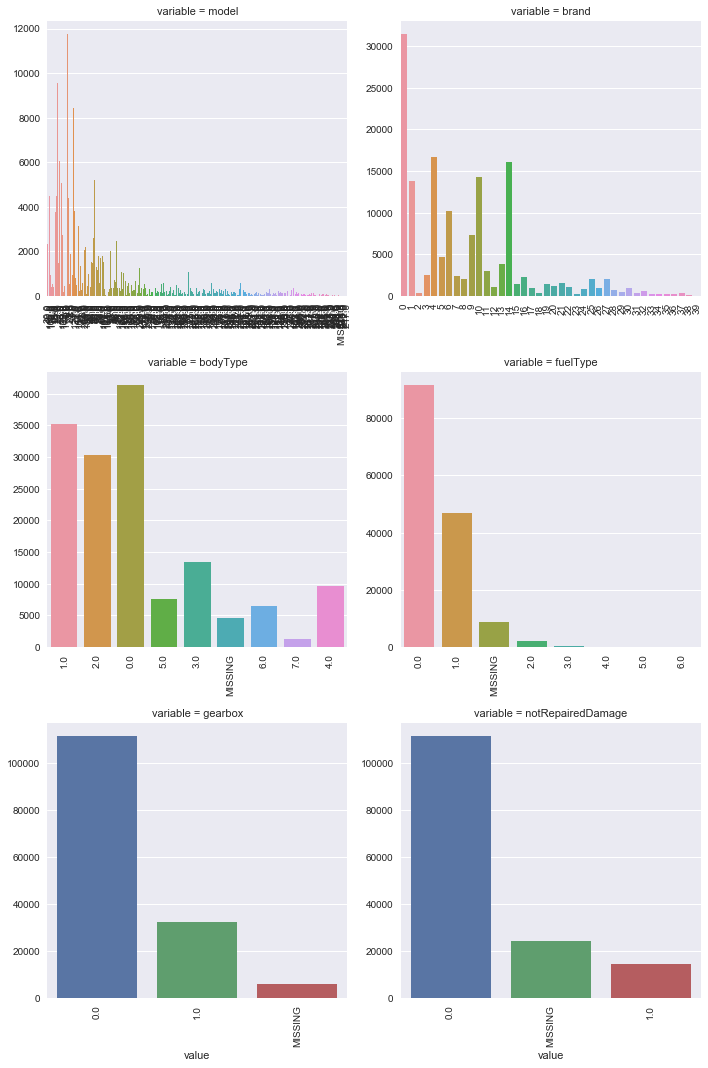

In [61]:
#类别特征频数可视化
def count_plot(x,**kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)
    
f = pd.melt(Train_data,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")

频率图：横轴为类别特征的取值，纵轴为对应的数据量

## 用pandas_profiling生成数据报告
用pandas_profiling生成一个较为全面的可视化和数据报告(较为简单、方便) 最终打开html文件即可

pandas-profiling确实和pandas有点关系，pandas-profiling能够使用DataFrame自动生成数据的详细报告，相比describe生成的profile要详细的多

详细：https://zhuanlan.zhihu.com/p/47548106

In [63]:
import pandas_profiling

In [66]:
#pfr=pandas_profiling.ProfileReport(Train_data)
#pfr.to_file("./example.html")
Train_data.describe()

,SaleID,regDate,power,kilometer,creatDate,price,v_0,v_1,v_2,v_3,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,1.500000e+05,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,2.003417e+07,119.316547,12.597160,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,5.364988e+04,177.168419,3.919576,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,1.991000e+07,0.000000,0.500000,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,1.999091e+07,75.000000,12.500000,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,2.003091e+07,110.000000,15.000000,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,2.007111e+07,150.000000,15.000000,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,2.015121e+07,19312.000000,15.000000,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418
